# Tomato Disease Classification

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install tensorflow

### Import all the Dependencies

In [71]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

{'Tomato_Bacterial_spot': 2127, 'Tomato_Early_blight': 1000, 'Tomato_healthy': 1591, 'Tomato_Late_blight': 1909, 'Tomato_Leaf_Mold': 952, 'Tomato_Septoria_leaf_spot': 1771, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1676, 'Tomato__Target_Spot': 1404, 'Tomato__Tomato_mosaic_virus': 373, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 3209}


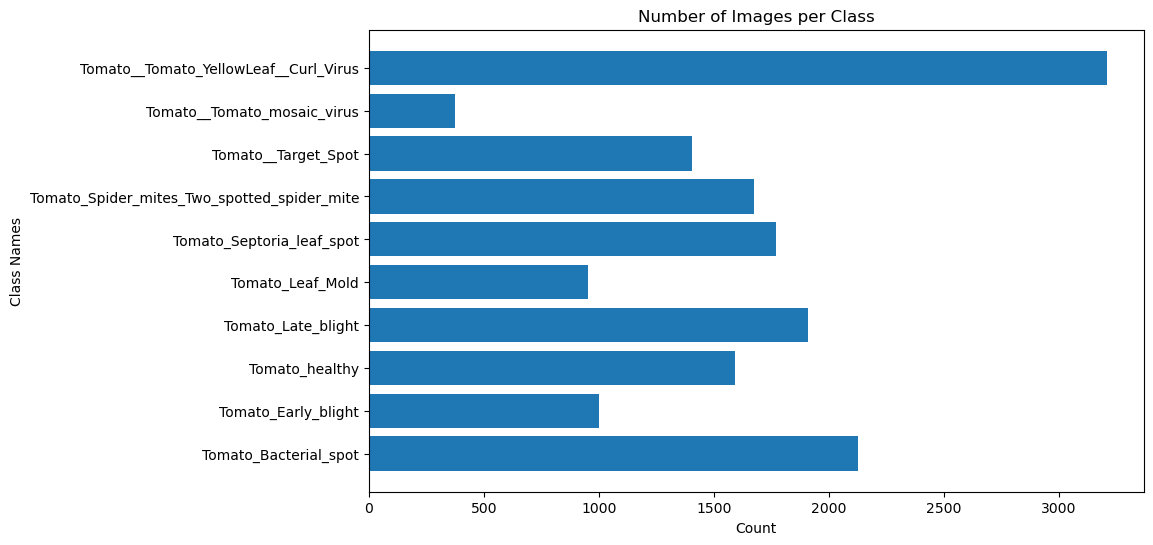

In [12]:
import os
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_dir = "Tomato"

# Get the list of class folders
class_folders = os.listdir(dataset_dir)

# Initialize an empty dictionary to hold class names and their counts
class_counts = {}

# Loop over each class folder and count the number of images
for class_folder in class_folders:
    class_dir = os.path.join(dataset_dir, class_folder)
    num_images = len(os.listdir(class_dir))
    class_counts[class_folder] = num_images

print(class_counts)

# Plot the counts
plt.figure(figsize=(10, 6))
plt.barh(range(len(class_counts)), list(class_counts.values()), align='center')
plt.yticks(range(len(class_counts)), list(class_counts.keys()))
plt.xlabel('Count')
plt.ylabel('Class Names')
plt.title('Number of Images per Class')
plt.show()


In [13]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import load_img

# Define the directory where the images are stored
dir_path = "Tomato"

# Define the class names
class_names = ['Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight','Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite','Tomato__Target_Spot','Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy']

# Create a new directory for the downsampled images
downsampled_dir = "downsampled"
os.makedirs(downsampled_dir, exist_ok=True)

# Loop over each class
for class_name in class_names:
    # Get a list of all image paths for this class
    image_paths = [os.path.join(dir_path, class_name, fname) for fname in os.listdir(os.path.join(dir_path, class_name))]

    # Randomly select 1000 image paths
    selected_paths = random.sample(image_paths, 1000)

    # Create a new directory for this class in the downsampled directory
    new_class_dir = os.path.join(downsampled_dir, class_name)
    os.makedirs(new_class_dir, exist_ok=True)

    # Copy the selected images to the new directory
    for path in selected_paths:
        shutil.copy(path, new_class_dir)


In [14]:
# !rm -rf "/content/drive/MyDrive/DataSetChilli/downsampled"


In [15]:
import shutil

# Define the source and destination directories
src_dir = "Tomato"
dest_dir = "downsampled"

# Define the class names to be copied
class_names = ['Tomato_Leaf_Mold',
 'Tomato__Tomato_mosaic_virus',]

# Loop over each class name
for class_name in class_names:
    # Define the source and destination paths for this class
    src_path = os.path.join(src_dir, class_name)
    dest_path = os.path.join(dest_dir, class_name)

    # Copy the directory
    shutil.copytree(src_path, dest_path)


In [16]:
import os
import shutil

# Define the directory where the images are stored
src_dir = "downsampled/Tomato__Tomato_mosaic_virus"

# Get a list of all image paths in the directory
image_paths = [os.path.join(src_dir, fname) for fname in os.listdir(src_dir)]

# Loop over each image path
for path in image_paths:
    # Get the base name of the image file (without the extension)
    base_name = os.path.splitext(os.path.basename(path))[0]

    # Define the paths for the copied images
    copy_path1 = os.path.join(src_dir, base_name + "_copy1.jpg")
    copy_path2 = os.path.join(src_dir, base_name + "_copy2.jpg")

    # Copy the image twice
    shutil.copy(path, copy_path1)
    shutil.copy(path, copy_path2)


{'Tomato_Bacterial_spot': 1000, 'Tomato_Early_blight': 1000, 'Tomato_healthy': 1000, 'Tomato_Late_blight': 1000, 'Tomato_Leaf_Mold': 952, 'Tomato_Septoria_leaf_spot': 1000, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1000, 'Tomato__Target_Spot': 1000, 'Tomato__Tomato_mosaic_virus': 1119, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 1000}


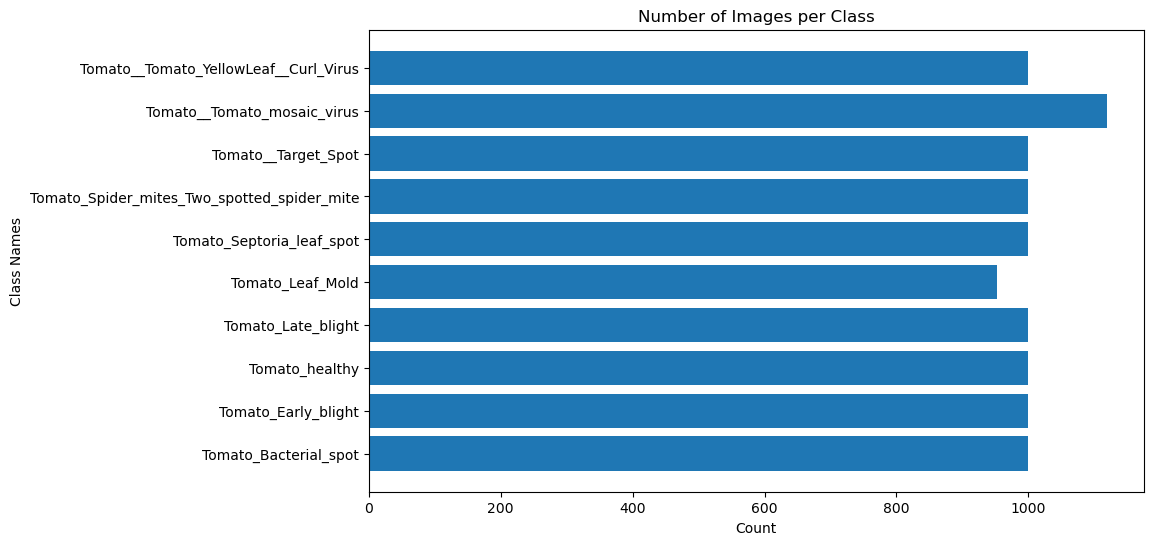

In [17]:
import os
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_dir = "downsampled"

# Get the list of class folders
class_folders = os.listdir(dataset_dir)

# Initialize an empty dictionary to hold class names and their counts
class_counts = {}

# Loop over each class folder and count the number of images
for class_folder in class_folders:
    class_dir = os.path.join(dataset_dir, class_folder)
    num_images = len(os.listdir(class_dir))
    class_counts[class_folder] = num_images

print(class_counts)

# Plot the counts
plt.figure(figsize=(10, 6))
plt.barh(range(len(class_counts)), list(class_counts.values()), align='center')
plt.yticks(range(len(class_counts)), list(class_counts.keys()))
plt.xlabel('Count')
plt.ylabel('Class Names')
plt.title('Number of Images per Class')
plt.show()


**Set all the Constants**

In [59]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=100

### Import data into tensorflow dataset object

We will use image_dataset_from_directory api to load all images in tensorflow

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "downsampled",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 10071 files belonging to 10 classes.


In [20]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(image_batch[1])
    print(labels_batch.numpy())

(32, 256, 256, 3)
tf.Tensor(
[[[161. 150. 158.]
  [164. 153. 161.]
  [165. 154. 162.]
  ...
  [187. 176. 182.]
  [164. 153. 159.]
  [171. 160. 166.]]

 [[161. 150. 158.]
  [160. 149. 157.]
  [160. 149. 157.]
  ...
  [160. 149. 155.]
  [154. 143. 149.]
  [159. 148. 154.]]

 [[164. 153. 161.]
  [160. 149. 157.]
  [157. 146. 154.]
  ...
  [166. 155. 161.]
  [134. 123. 129.]
  [164. 153. 159.]]

 ...

 [[179. 168. 172.]
  [171. 160. 164.]
  [163. 152. 156.]
  ...
  [173. 161. 165.]
  [149. 137. 141.]
  [211. 199. 203.]]

 [[172. 161. 165.]
  [168. 157. 161.]
  [163. 152. 156.]
  ...
  [155. 143. 147.]
  [153. 141. 145.]
  [140. 128. 132.]]

 [[163. 152. 156.]
  [165. 154. 158.]
  [167. 156. 160.]
  ...
  [186. 174. 178.]
  [141. 129. 133.]
  [163. 151. 155.]]], shape=(256, 256, 3), dtype=float32)
[6 4 3 6 5 6 4 7 8 2 8 2 3 2 5 6 4 1 4 4 8 4 2 5 9 5 9 3 5 6 0 9]


As you can see above, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

### Visualize some of the images from our dataset

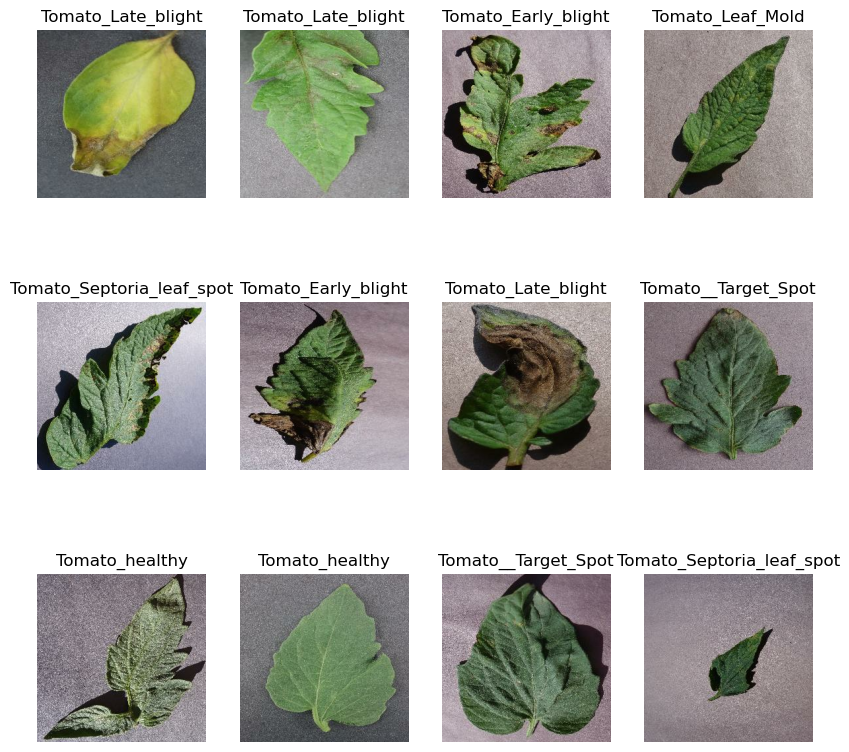

In [22]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [23]:
len(dataset)

315

In [24]:
train_size = 0.8
len(dataset)*train_size

252.0

In [25]:
train_ds = dataset.take(252)
len(train_ds)

252

In [26]:
test_ds = dataset.skip(252)
len(test_ds)

63

In [27]:
val_size=0.1
len(dataset)*val_size

31.5

In [28]:
val_ds = test_ds.take(31)
len(val_ds)

31

In [29]:
test_ds = test_ds.skip(31)
len(test_ds)

32

In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

252

In [33]:
len(val_ds)

31

In [34]:
len(test_ds)

32

### Cache, Shuffle, and Prefetch the Dataset

In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Building the Model

### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size.
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [36]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [37]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

#### Applying Data Augmentation to Train Dataset

In [38]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



### Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [39]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [41]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=100,
)

Epoch 1/100
252/252 [==============================] - 727s 3s/step - loss: 1.9994 - accuracy: 0.2319 - val_loss: 2.1072 - val_accuracy: 0.2777
Epoch 2/100
252/252 [==============================] - 717s 3s/step - loss: 1.5391 - accuracy: 0.4286 - val_loss: 1.3969 - val_accuracy: 0.5148
Epoch 3/100
252/252 [==============================] - 652s 3s/step - loss: 1.1928 - accuracy: 0.5670 - val_loss: 2.1403 - val_accuracy: 0.4059
Epoch 4/100
252/252 [==============================] - 631s 3s/step - loss: 0.9568 - accuracy: 0.6581 - val_loss: 2.5781 - val_accuracy: 0.4049
Epoch 5/100
252/252 [==============================] - 619s 2s/step - loss: 0.7828 - accuracy: 0.7161 - val_loss: 1.7201 - val_accuracy: 0.5198
Epoch 6/100
252/252 [==============================] - 616s 2s/step - loss: 0.6580 - accuracy: 0.7654 - val_loss: 0.8818 - val_accuracy: 0.6928
Epoch 7/100
252/252 [==============================] - 609s 2s/step - loss: 0.6280 - accuracy: 0.7680 - val_loss: 0.9912 - val_accuracy:

252/252 [==============================] - 594s 2s/step - loss: 0.1185 - accuracy: 0.9598 - val_loss: 0.4436 - val_accuracy: 0.8718
Epoch 58/100
252/252 [==============================] - 591s 2s/step - loss: 0.1012 - accuracy: 0.9646 - val_loss: 0.2306 - val_accuracy: 0.9461
Epoch 59/100
252/252 [==============================] - 598s 2s/step - loss: 0.0756 - accuracy: 0.9733 - val_loss: 0.2267 - val_accuracy: 0.9420
Epoch 60/100
252/252 [==============================] - 600s 2s/step - loss: 0.0893 - accuracy: 0.9667 - val_loss: 0.1464 - val_accuracy: 0.9736
Epoch 61/100
252/252 [==============================] - 594s 2s/step - loss: 0.1276 - accuracy: 0.9562 - val_loss: 0.1972 - val_accuracy: 0.9613
Epoch 62/100
252/252 [==============================] - 578s 2s/step - loss: 0.1053 - accuracy: 0.9650 - val_loss: 0.1897 - val_accuracy: 0.9644
Epoch 63/100
252/252 [==============================] - 585s 2s/step - loss: 0.0754 - accuracy: 0.9750 - val_loss: 0.3154 - val_accuracy: 0.923

In [43]:
scores = model.evaluate(test_ds)

32/32 [==============================] - 80s 965ms/step - loss: 0.3623 - accuracy: 0.9043


**You can see above that we get 100.00% accuracy for our test dataset. This is considered to be a pretty good accuracy**

In [44]:
scores

[0.3622790575027466, 0.904296875]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [45]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [46]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 252}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [48]:
type(history.history['loss'])

list

In [49]:
len(history.history['loss'])

100

In [50]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.9994086027145386,
 1.5390859842300415,
 1.1928021907806396,
 0.9568077921867371,
 0.7828238010406494]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [56]:
len(val_loss)

100

In [58]:
print(EPOCHS)

50


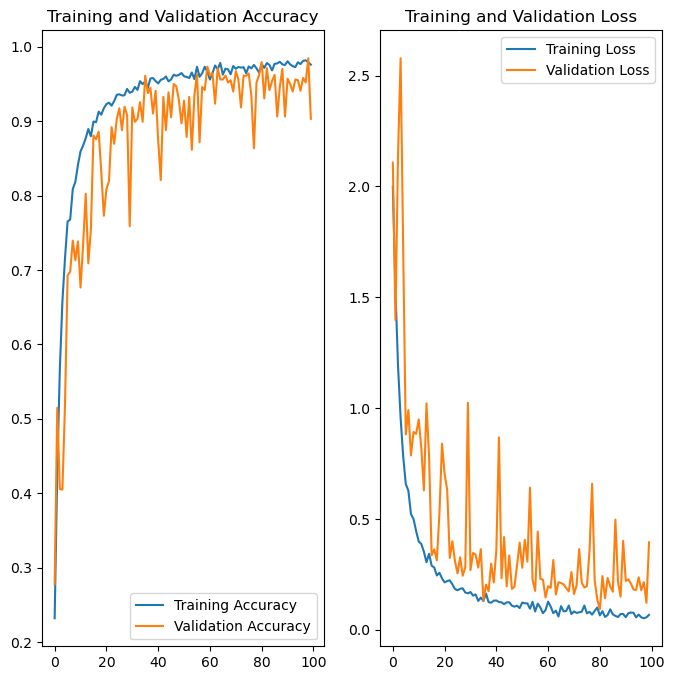

In [60]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [112]:
class_names = dataset.class_names
class_names

print(class_names)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [106]:
num_batches = tf.data.experimental.cardinality(test_ds).numpy()
print(f"Number of batches in test_ds: {num_batches}")

Number of batches in test_ds: 32


In [107]:
def predict_on_image(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = np.argmax(predictions[0])
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [108]:
# Initialize lists to store the actual and predicted labels
actual_labels_list = []
predicted_labels_list = []

for images, labels in test_ds:
    for i in range(len(images)):
        predicted_class, confidence = predict_on_image(model, images[i].numpy())
        actual_class = labels[i]

        actual_labels_list.append(actual_class)
        
        # Append the predicted label to the list of predicted labels
        predicted_labels_list.append(predicted_class)

        print(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

1/1 [==============================] - 0s 216ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 353ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 294ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 88.79%
1/1 [==============================] - 0s 402ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 74.92%
1/1 [==============================] - 0s 312ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 61.69%
1/1 [==============================] - 0s 364ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 271ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 99.9%
1/1 [==============================] - 0s 348ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 414ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 100.0%
1/1 [==============================] - 0s 364ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 99.09%
1/1 [======

1/1 [==============================] - 0s 371ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 63.62%
1/1 [==============================] - 0s 192ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 54.78%
1/1 [==============================] - 0s 278ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 99.95%
1/1 [==============================] - 0s 375ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 91.0%
1/1 [==============================] - 0s 261ms/step
Actual: 8,
 Predicted: 3.
 Confidence: 99.73%
1/1 [==============================] - 0s 87ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.98%
1/1 [==============================] - 0s 332ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 99.77%
1/1 [==============================] - 0s 201ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.88%
1/1 [==============================] - 0s 310ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 98.92%
1/1 [==============================] - 0s 275ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 100.0%
1/1 [=======

1/1 [==============================] - 0s 418ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 402ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 97.09%
1/1 [==============================] - 0s 372ms/step
Actual: 6,
 Predicted: 9.
 Confidence: 74.33%
1/1 [==============================] - 0s 344ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 349ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 93.04%
1/1 [==============================] - 1s 531ms/step
Actual: 1,
 Predicted: 4.
 Confidence: 65.97%
1/1 [==============================] - 0s 376ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 339ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 100.0%
1/1 [==============================] - 0s 383ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.93%
1/1 [==============================] - 0s 421ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.78%
1/1 [=====

1/1 [==============================] - 0s 357ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 100.0%
1/1 [==============================] - 0s 315ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 59.94%
1/1 [==============================] - 0s 277ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 99.68%
1/1 [==============================] - 0s 345ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 100.0%
1/1 [==============================] - 0s 318ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 100.0%
1/1 [==============================] - 0s 347ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 352ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 100.0%
1/1 [==============================] - 0s 245ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 426ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 100.0%
1/1 [==============================] - 0s 303ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 100.0%
1/1 [=====

1/1 [==============================] - 0s 262ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 385ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 100.0%
1/1 [==============================] - 0s 262ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 100.0%
1/1 [==============================] - 0s 89ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 99.98%
1/1 [==============================] - 0s 189ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.92%
1/1 [==============================] - 0s 331ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 373ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 97.98%
1/1 [==============================] - 0s 367ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 141ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 99.77%
1/1 [==============================] - 0s 139ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 99.92%
1/1 [======

1/1 [==============================] - 0s 283ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 291ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 100.0%
1/1 [==============================] - 0s 378ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 100.0%
1/1 [==============================] - 0s 353ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 100.0%
1/1 [==============================] - 0s 349ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 99.68%
1/1 [==============================] - 0s 158ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 86.19%
1/1 [==============================] - 0s 249ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.8%
1/1 [==============================] - 0s 337ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.08%
1/1 [==============================] - 0s 147ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.56%
1/1 [==============================] - 0s 360ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 98.94%
1/1 [======

1/1 [==============================] - 0s 213ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 319ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 49.3%
1/1 [==============================] - 0s 293ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.5%
1/1 [==============================] - 0s 313ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.99%
1/1 [==============================] - 0s 399ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 400ms/step
Actual: 5,
 Predicted: 4.
 Confidence: 99.1%
1/1 [==============================] - 0s 156ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.58%
1/1 [==============================] - 0s 224ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 99.69%
1/1 [==============================] - 0s 174ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 78.77%
1/1 [==============================] - 0s 414ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.92%
1/1 [========

1/1 [==============================] - 0s 348ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.91%
1/1 [==============================] - 0s 398ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.42%
1/1 [==============================] - 0s 191ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 98.32%
1/1 [==============================] - 0s 205ms/step
Actual: 1,
 Predicted: 3.
 Confidence: 71.61%
1/1 [==============================] - 0s 234ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 100.0%
1/1 [==============================] - 0s 351ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 165ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 98.42%
1/1 [==============================] - 0s 393ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 98.77%
1/1 [==============================] - 0s 261ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 1s 759ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [=====

1/1 [==============================] - 0s 177ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 197ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 99.99%
1/1 [==============================] - 0s 172ms/step
Actual: 6,
 Predicted: 4.
 Confidence: 98.02%
1/1 [==============================] - 0s 277ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 100.0%
1/1 [==============================] - 0s 374ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 95.46%
1/1 [==============================] - 0s 232ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 97.18%
1/1 [==============================] - 0s 225ms/step
Actual: 2,
 Predicted: 1.
 Confidence: 74.89%
1/1 [==============================] - 0s 206ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 182ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 299ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 99.97%
1/1 [=====

1/1 [==============================] - 0s 221ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 187ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 97.5%
1/1 [==============================] - 0s 148ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 93.27%
1/1 [==============================] - 0s 146ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 407ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.97%
1/1 [==============================] - 1s 545ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 438ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.49%
1/1 [==============================] - 0s 358ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 492ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 99.98%
1/1 [==============================] - 0s 202ms/step
Actual: 6,
 Predicted: 6.
 Confidence: 99.99%
1/1 [======

1/1 [==============================] - 0s 153ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 78.53%
1/1 [==============================] - 0s 423ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 97.19%
1/1 [==============================] - 0s 174ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 95.61%
1/1 [==============================] - 0s 190ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.97%
1/1 [==============================] - 0s 272ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 95.56%
1/1 [==============================] - 0s 208ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 68.79%
1/1 [==============================] - 0s 348ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 366ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 365ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 99.51%
1/1 [==============================] - 0s 366ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 93.65%
1/1 [=====

1/1 [==============================] - 0s 194ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 51.4%
1/1 [==============================] - 0s 347ms/step
Actual: 2,
 Predicted: 2.
 Confidence: 99.65%
1/1 [==============================] - 0s 292ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 76.78%
1/1 [==============================] - 0s 300ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 285ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 252ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 308ms/step
Actual: 8,
 Predicted: 8.
 Confidence: 100.0%
1/1 [==============================] - 0s 122ms/step
Actual: 3,
 Predicted: 3.
 Confidence: 100.0%
1/1 [==============================] - 0s 239ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 62.28%
1/1 [==============================] - 0s 253ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.68%
1/1 [======

1/1 [==============================] - 1s 652ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 100.0%
1/1 [==============================] - 1s 768ms/step
Actual: 7,
 Predicted: 7.
 Confidence: 100.0%
1/1 [==============================] - 0s 371ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 410ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.93%
1/1 [==============================] - 0s 355ms/step
Actual: 4,
 Predicted: 4.
 Confidence: 99.99%
1/1 [==============================] - 0s 278ms/step
Actual: 1,
 Predicted: 1.
 Confidence: 72.92%
1/1 [==============================] - 0s 413ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 98.04%
1/1 [==============================] - 0s 368ms/step
Actual: 5,
 Predicted: 5.
 Confidence: 99.73%
1/1 [==============================] - 0s 429ms/step
Actual: 9,
 Predicted: 9.
 Confidence: 100.0%
1/1 [==============================] - 0s 234ms/step
Actual: 0,
 Predicted: 0.
 Confidence: 99.59%
1/1 [=====

In [109]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists to numpy arrays for compatibility with sklearn metrics
actual_labels_array = np.array(actual_labels_list)
predicted_labels_array = np.array(predicted_labels_list)

In [110]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(actual_labels_array, predicted_labels_array)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       114
           1       0.88      0.88      0.88        96
           2       0.98      0.87      0.92        91
           3       0.98      0.87      0.92        93
           4       0.81      1.00      0.89        71
           5       0.95      0.83      0.89       125
           6       0.95      0.79      0.86       109
           7       0.99      0.97      0.98       115
           8       0.87      0.93      0.90        96
           9       0.75      1.00      0.86       114

    accuracy                           0.90      1024
   macro avg       0.91      0.91      0.90      1024
weighted avg       0.91      0.90      0.91      1024



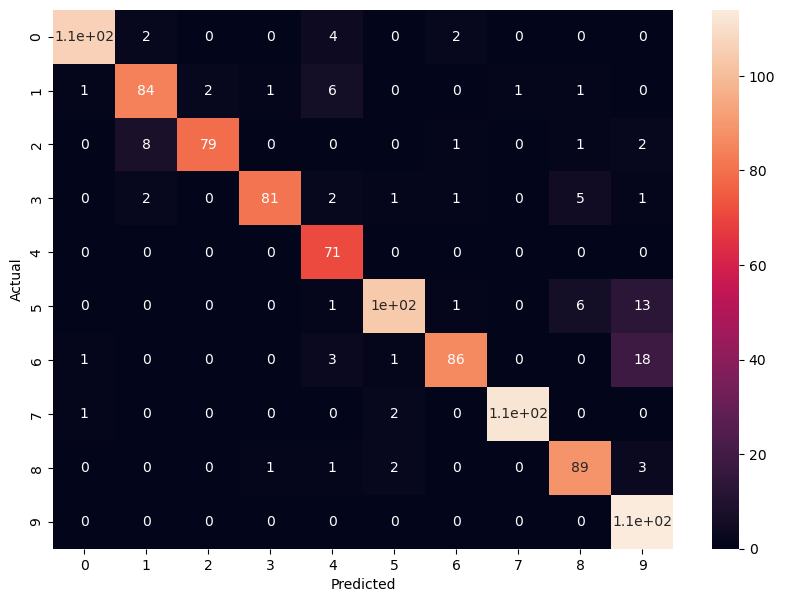

In [125]:
# Calculate confusion matrix
cm = confusion_matrix(actual_labels_array, predicted_labels_array)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Tomato_Spider_mites_Two_spotted_spider_mite
(32, 256, 256, 3)
1/1 [==============================] - 3s 3s/step
predicted label: Tomato__Tomato_mosaic_virus


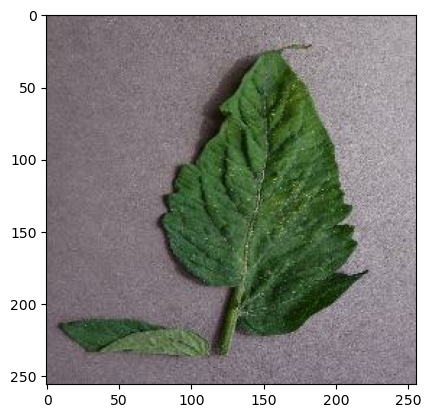

In [61]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    # print(first_image)
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    print(images_batch.shape)

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

### Write a function for inference

In [62]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [62]:
for images, labels in test_ds.take(1):
  print(images[0])

tf.Tensor(
[[[140. 141. 172.]
  [137. 138. 169.]
  [134. 135. 166.]
  ...
  [ 80.  75. 107.]
  [127. 122. 154.]
  [109. 104. 136.]]

 [[137. 138. 169.]
  [134. 135. 166.]
  [133. 134. 165.]
  ...
  [122. 117. 149.]
  [130. 125. 157.]
  [ 99.  94. 126.]]

 [[135. 136. 167.]
  [134. 135. 166.]
  [133. 134. 165.]
  ...
  [115. 110. 142.]
  [118. 113. 145.]
  [150. 145. 177.]]

 ...

 [[157. 153. 176.]
  [156. 152. 175.]
  [155. 151. 174.]
  ...
  [137. 129. 150.]
  [178. 170. 191.]
  [121. 113. 134.]]

 [[159. 155. 178.]
  [156. 152. 175.]
  [154. 150. 173.]
  ...
  [145. 137. 158.]
  [170. 162. 183.]
  [132. 124. 145.]]

 [[160. 156. 179.]
  [157. 153. 176.]
  [154. 150. 173.]
  ...
  [132. 124. 145.]
  [152. 144. 165.]
  [176. 168. 189.]]], shape=(256, 256, 3), dtype=float32)


1/1 [==============================] - 0s 317ms/step


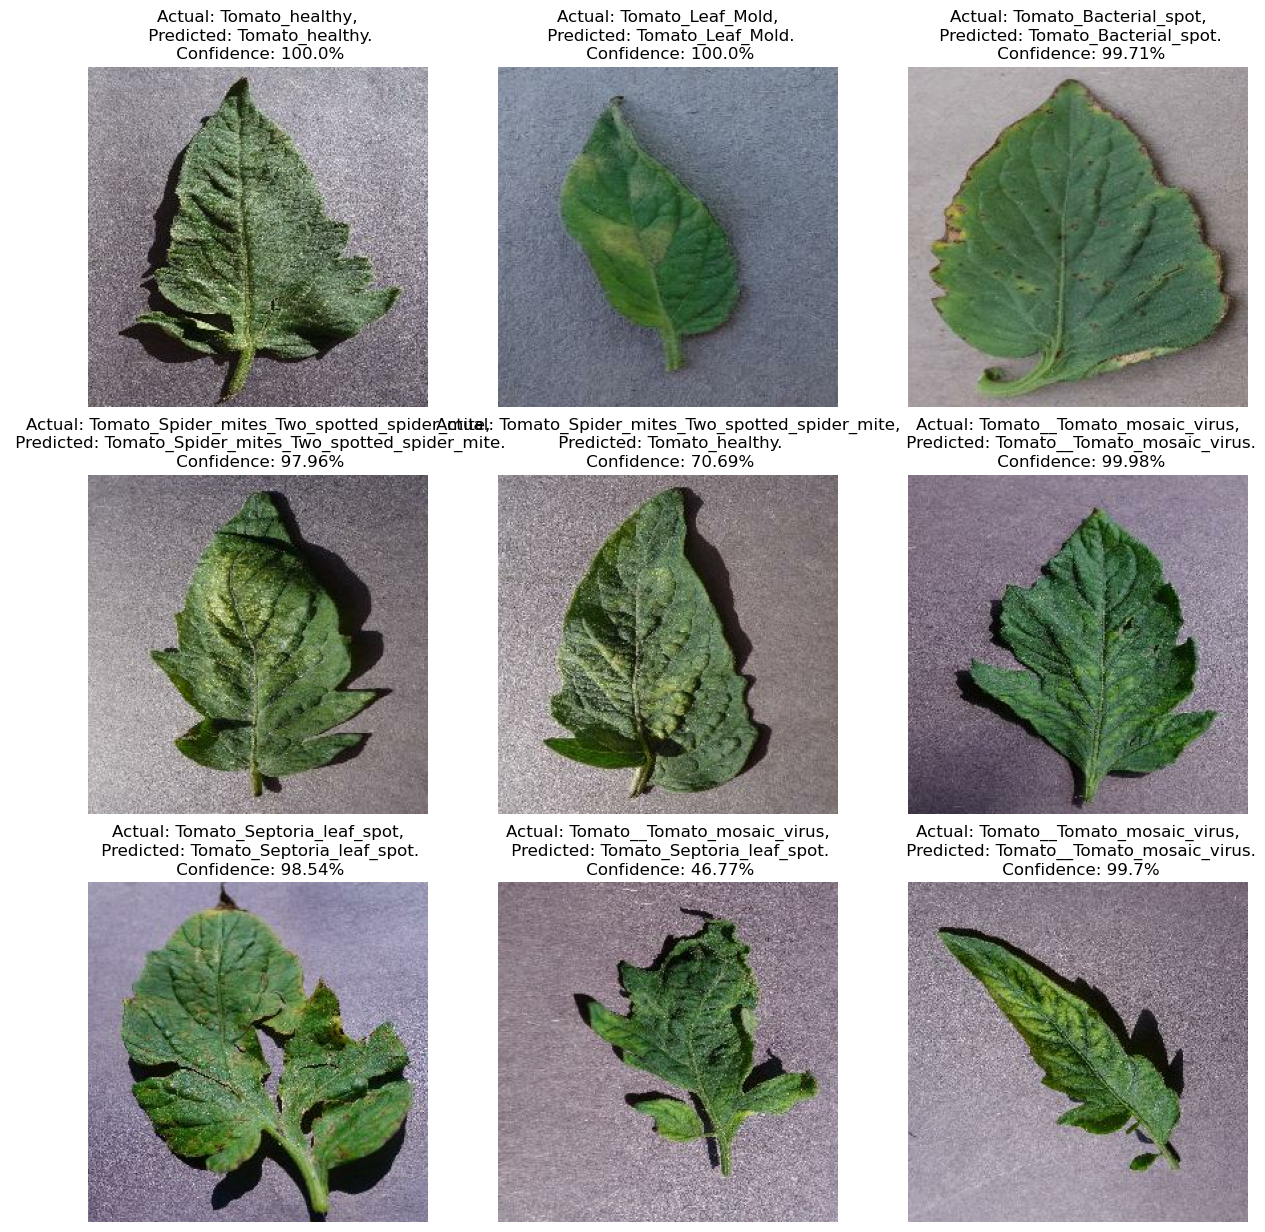

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

**Now run inference on few sample images**

1/1 [==============================] - 0s 354ms/step


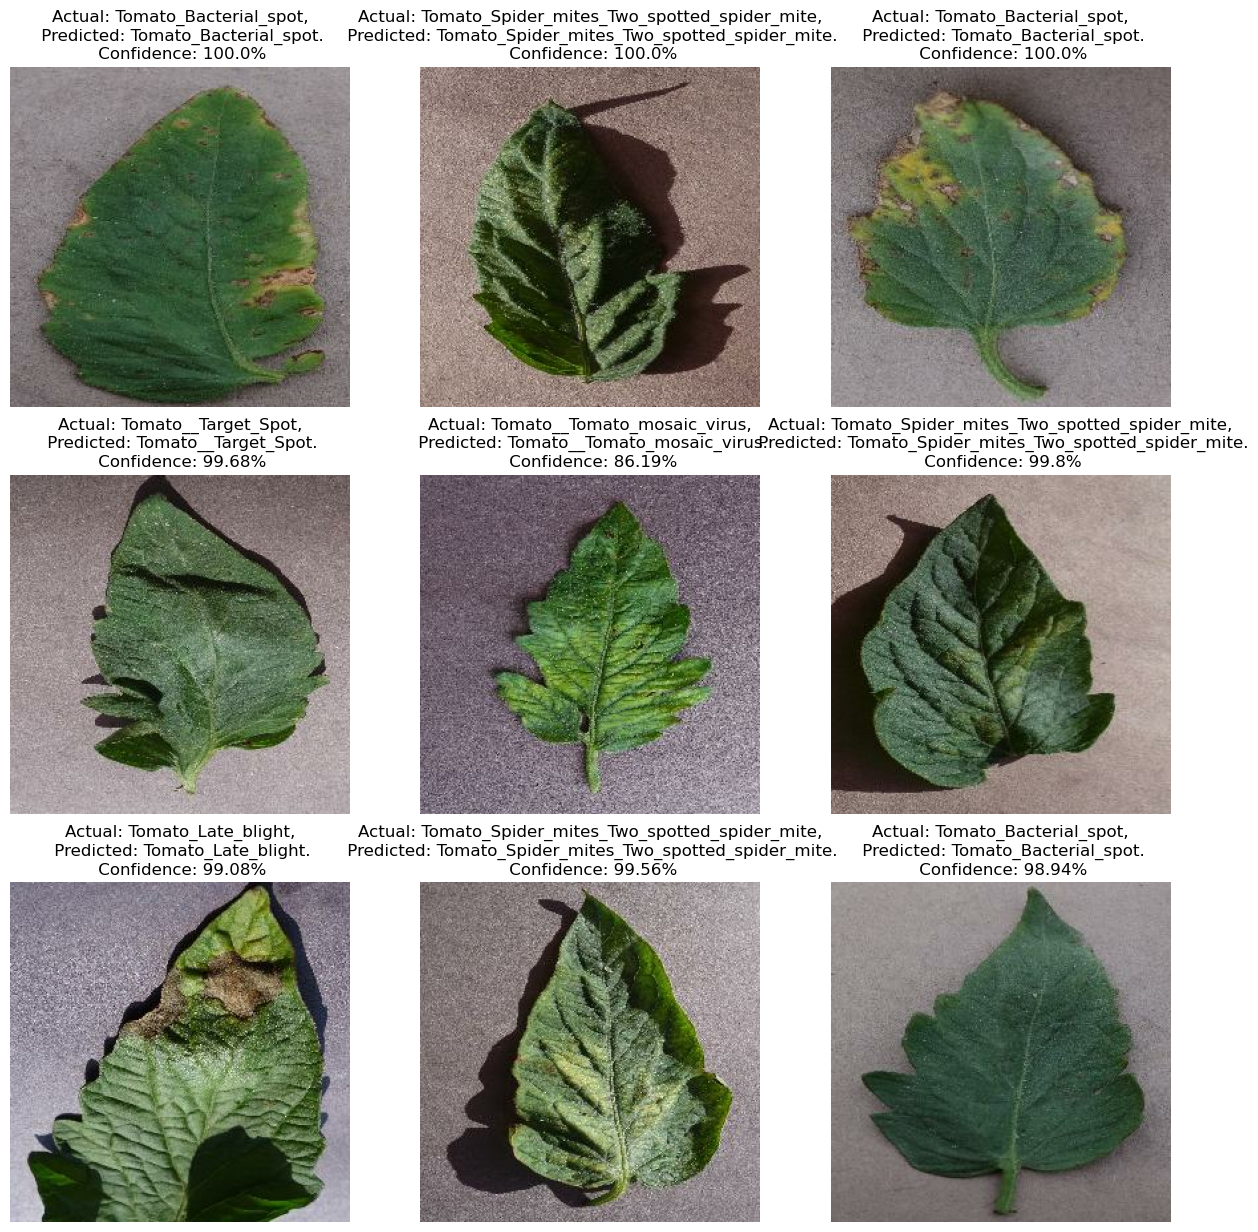

In [82]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

### Saving the Model
We append the model to the list of models as a new version

In [67]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


In [68]:
model.save("Tomato.h5")

C:\Users\supun.H\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
model = tf.keras.models.load_model("Tomato.h5")

1/1 [==============================] - 0s 169ms/step


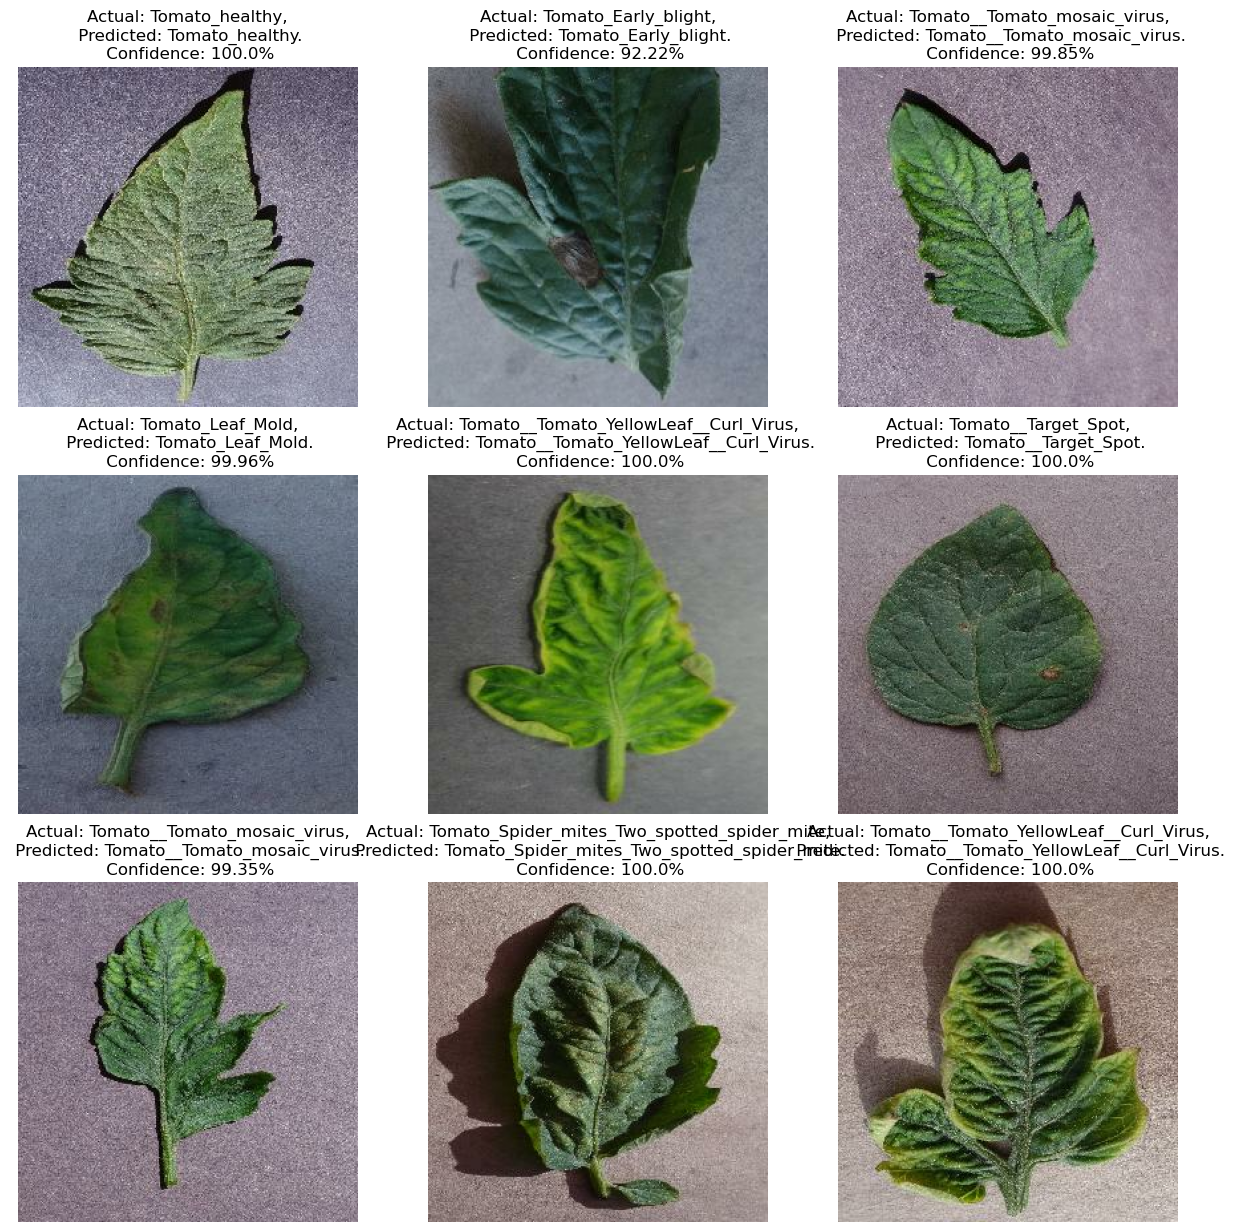

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")